In [2]:
import pysam
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

In [3]:
fetch_df = pd.read_csv('interesting_genes.bed', sep='\t', header=None, names=['chr', 'start', 'stop', 'gene'])

In [4]:
fetch_df

,chr,start,stop,gene
0,chr17,39688094,39728658,ERBB2
1,chr17,43044295,43170327,BRCA1
2,chr13,32315508,32400268,BRCA2
3,chr11,125625136,125681124,CHEK1
4,chr22,28687743,28741834,CHEK2
5,chr7,55019017,55211628,EGFR
6,chr8,38411143,38468635,FGFR1
7,chr10,121478330,121598458,FGFR2
8,chr4,1793293,1808867,FGFR3
9,chr7,116672196,116798377,MET


In [5]:
#pysam.index("../WES-normal.bam")

In [6]:
samfile = pysam.AlignmentFile('../WES-normal.bam', 'rb')
genes_bam = pysam.AlignmentFile('../genes.bam', 'wb', template=samfile)

i = 0
d = []

for index, gene in fetch_df.iterrows():
    print(gene['gene'])
    for read in samfile.fetch(gene['chr'], gene['start'] - 200000, gene['stop'] + 200000):
        genes_bam.write(read)
        if i < 21:
            #print(read)
            i+=1
    for pileupcolumn in samfile.pileup(gene['chr'], gene['start'] - 200000, gene['stop'] + 200000):
        d.append(
                {
                    'Position': pileupcolumn.pos,
                    'Read Count': pileupcolumn.n,
                    'Chromosome': gene['chr'],
                    'Gene': gene['gene']
                }
            )

df_normal = pd.DataFrame(d)


genes_bam.close()
samfile.close()

ERBB2
BRCA1
BRCA2
CHEK1
CHEK2
EGFR
FGFR1
FGFR2
FGFR3
MET
MTAP
MDM2
NF1
NTRK1
PALB2
RB1
STK11
TSC1
TSC2
TP53
CDKN2A


In [7]:
df_normal

,Position,Read Count,Chromosome,Gene
0,39487986,1,chr17,ERBB2
1,39487987,1,chr17,ERBB2
2,39487988,1,chr17,ERBB2
3,39487989,1,chr17,ERBB2
4,39487990,1,chr17,ERBB2
...,...,...,...,...
5401166,22194726,2,chr9,CDKN2A
5401167,22194727,2,chr9,CDKN2A
5401168,22194728,2,chr9,CDKN2A
5401169,22194729,2,chr9,CDKN2A


In [8]:
#pysam.index("../WES-tumor.bam")

In [9]:
samfile = pysam.AlignmentFile('../WES-tumor.bam', 'rb')
genes_bam = pysam.AlignmentFile('../genes_tumor.bam', 'wb', template=samfile)

i = 0
d = []

for index, gene in fetch_df.iterrows():
    print(gene['gene'])
    for read in samfile.fetch(gene['chr'], gene['start'] - 200000, gene['stop'] + 200000):
        genes_bam.write(read)

        ############
        if i < 21:
            #print(read)
            i+=1

    #############
    
    for pileupcolumn in samfile.pileup(gene['chr'], gene['start'] - 200000, gene['stop'] + 200000):
            d.append(
                {
                    'Position': pileupcolumn.pos,
                    'Read Count': pileupcolumn.n,
                    'Chromosome': gene['chr'],
                    'Gene': gene['gene']
                }
            )

df_tumor = pd.DataFrame(d)

genes_bam.close()
samfile.close()

ERBB2
BRCA1
BRCA2
CHEK1
CHEK2
EGFR
FGFR1
FGFR2
FGFR3
MET
MTAP
MDM2
NF1
NTRK1
PALB2
RB1
STK11
TSC1
TSC2
TP53
CDKN2A


In [10]:
df_tumor

,Position,Read Count,Chromosome,Gene
0,39488102,1,chr17,ERBB2
1,39488103,1,chr17,ERBB2
2,39488104,1,chr17,ERBB2
3,39488105,1,chr17,ERBB2
4,39488106,1,chr17,ERBB2
...,...,...,...,...
5031632,22195152,2,chr9,CDKN2A
5031633,22195153,2,chr9,CDKN2A
5031634,22195154,2,chr9,CDKN2A
5031635,22195155,2,chr9,CDKN2A


In [11]:
df_tumor.pivot_table(columns=['Position'], aggfunc='size')[df_tumor.pivot_table(columns=['Position'], aggfunc='size')>1]

Position
1847975     2
1847976     2
1847977     2
1847978     2
1847979     2
           ..
22140553    2
22140554    2
22140555    2
22140556    2
22140557    2
Length: 145822, dtype: int64

In [12]:
df_tumor[df_tumor['Position'] == 39687957]

,Position,Read Count,Chromosome,Gene
154925,39687957,943,chr17,ERBB2


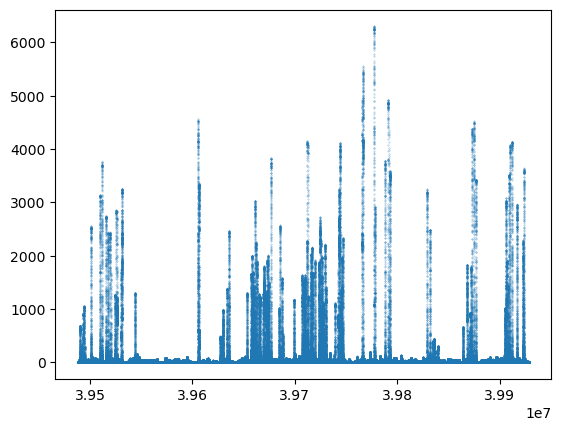

In [13]:
plt.scatter(df_tumor[df_tumor['Gene'] == 'ERBB2']['Position'], df_tumor[df_tumor['Gene'] == 'ERBB2']['Read Count'], alpha=0.5, s=0.1)

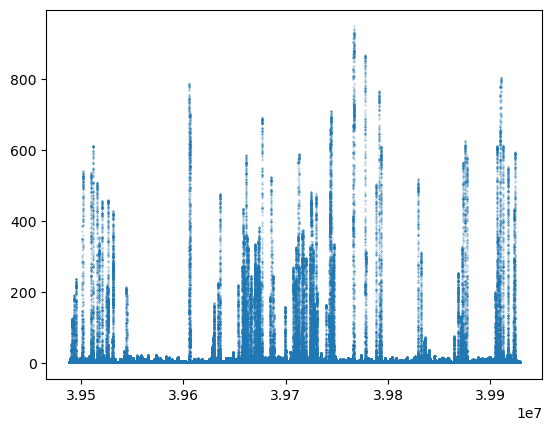

In [14]:
plt.scatter(df_normal[df_normal['Gene'] == 'ERBB2']['Position'], df_normal[df_normal['Gene'] == 'ERBB2']['Read Count'], alpha=0.5, s=0.1)

In [15]:
df_total = df_tumor.merge(df_normal, left_on='Position', right_on='Position',
          suffixes=('_tumor', '_normal'), how='outer')

In [16]:
df_total

,Position,Read Count_tumor,Chromosome_tumor,Gene_tumor,Read Count_normal,Chromosome_normal,Gene_normal
0,39488102,1.0,chr17,ERBB2,2.0,chr17,ERBB2
1,39488103,1.0,chr17,ERBB2,2.0,chr17,ERBB2
2,39488104,1.0,chr17,ERBB2,2.0,chr17,ERBB2
3,39488105,1.0,chr17,ERBB2,2.0,chr17,ERBB2
4,39488106,1.0,chr17,ERBB2,2.0,chr17,ERBB2
...,...,...,...,...,...,...,...
6969570,22194726,NaN,NaN,NaN,2.0,chr9,CDKN2A
6969571,22194727,NaN,NaN,NaN,2.0,chr9,CDKN2A
6969572,22194728,NaN,NaN,NaN,2.0,chr9,CDKN2A
6969573,22194729,NaN,NaN,NaN,2.0,chr9,CDKN2A


In [17]:
df_dupl = df_total.pivot_table(columns=['Position'], aggfunc='size')

In [18]:
df_dupl[df_dupl > 1]

Position
1847975     2
1847976     2
1847977     2
1847978     2
1847979     2
           ..
22140553    2
22140554    2
22140555    2
22140556    2
22140557    2
Length: 259403, dtype: int64

In [19]:
df_total['depth_ratio'] = df_total['Read Count_tumor'] / df_total['Read Count_normal']

In [20]:
df_total

,Position,Read Count_tumor,Chromosome_tumor,Gene_tumor,Read Count_normal,Chromosome_normal,Gene_normal,depth_ratio
0,39488102,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5
1,39488103,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5
2,39488104,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5
3,39488105,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5
4,39488106,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5
...,...,...,...,...,...,...,...,...
6969570,22194726,NaN,NaN,NaN,2.0,chr9,CDKN2A,NaN
6969571,22194727,NaN,NaN,NaN,2.0,chr9,CDKN2A,NaN
6969572,22194728,NaN,NaN,NaN,2.0,chr9,CDKN2A,NaN
6969573,22194729,NaN,NaN,NaN,2.0,chr9,CDKN2A,NaN


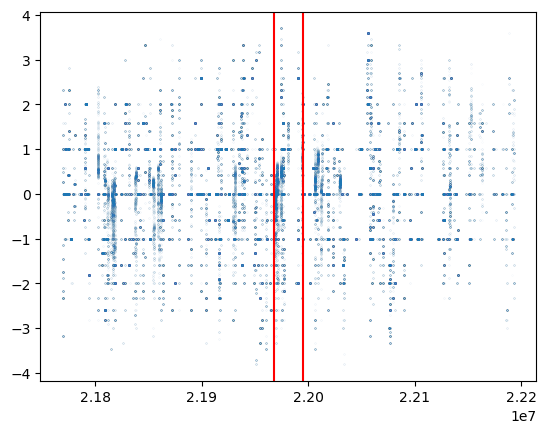

In [21]:
target_gene = 'CDKN2A'
plt.scatter(df_total[df_total['Gene_tumor'] == target_gene]['Position'], np.log2(df_total[df_total['Gene_tumor'] == target_gene]['depth_ratio']), alpha=0.5, s=0.001)
plt.axvline(x = fetch_df[fetch_df['gene'] == target_gene]['start'].iloc[0], color = 'r')
plt.axvline(x = fetch_df[fetch_df['gene'] == target_gene]['stop'].iloc[0], color = 'r')

In [22]:
type(fetch_df[fetch_df['gene'] == target_gene]['start'].iloc[0])

numpy.int64

In [53]:
bin_size = 5000
bins = np.concatenate([([i]*bin_size) for i in range(ceil(df_total.shape[0] / bin_size))], axis=0)[:df_total.shape[0]]
df_total['bin'] = bins

In [54]:
df_total

,Position,Read Count_tumor,Chromosome_tumor,Gene_tumor,Read Count_normal,Chromosome_normal,Gene_normal,depth_ratio,bin
0,39488102,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5,0
1,39488103,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5,0
2,39488104,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5,0
3,39488105,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5,0
4,39488106,1.0,chr17,ERBB2,2.0,chr17,ERBB2,0.5,0
...,...,...,...,...,...,...,...,...,...
6969570,22194726,NaN,NaN,NaN,2.0,chr9,CDKN2A,NaN,1393
6969571,22194727,NaN,NaN,NaN,2.0,chr9,CDKN2A,NaN,1393
6969572,22194728,NaN,NaN,NaN,2.0,chr9,CDKN2A,NaN,1393
6969573,22194729,NaN,NaN,NaN,2.0,chr9,CDKN2A,NaN,1393


In [55]:
df_group = df_total[['Position', 'depth_ratio', 'bin']].groupby(['bin'])['depth_ratio'].median()

In [56]:
df_group

bin
0       4.500000
1       4.250000
2       4.404834
3       4.000000
4       4.000000
          ...   
1389         NaN
1390         NaN
1391         NaN
1392         NaN
1393         NaN
Name: depth_ratio, Length: 1394, dtype: float64

In [58]:
df_group = df_group.reset_index() 
df_group

,bin,depth_ratio
0,0,4.500000
1,1,4.250000
2,2,4.404834
3,3,4.000000
4,4,4.000000
...,...,...
1389,1389,NaN
1390,1390,NaN
1391,1391,NaN
1392,1392,NaN


In [ ]:
for bin in bins:
    df_total['median_depth_ratio'] = np.nan
    df_total.loc[df_total['bin'] == bin, 'median_depth_ratio'] = df_group[df_group['bin'] == bin]['depth_ratio']

In [ ]:
df_total